<a href="https://colab.research.google.com/github/trungtranle/VisualNeuro_ephys/blob/main/VN_ephys_whole_cell_current_clamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting Data**

In [1]:
!wget https://github.com/trungtranle/VisualNeuro_ephys/raw/refs/heads/main/data_whole_cell_CC.mat

--2025-08-06 18:03:24--  https://github.com/trungtranle/VisualNeuro_ephys/raw/refs/heads/main/data_whole_cell_CC.mat
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/trungtranle/VisualNeuro_ephys/refs/heads/main/data_whole_cell_CC.mat [following]
--2025-08-06 18:03:25--  https://raw.githubusercontent.com/trungtranle/VisualNeuro_ephys/refs/heads/main/data_whole_cell_CC.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17026147 (16M) [application/octet-stream]
Saving to: ‘data_whole_cell_CC.mat’

data_whole_cell_CC. 100%[===================>]  16.24M  30.9MB/s    in 0.5s    

2025-08-06 18:03:2

*Disclosure: lots of spaghetti code, not optimized, may takes lots of memory to run*



In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import seaborn as sns

In [3]:
mat_file = loadmat('data_whole_cell_CC.mat', squeeze_me = True)

In [4]:
mat_file['data_to_send'].dtype

dtype([('data', 'O'), ('cell_id', 'O')])

In [5]:
data_cell_1 = mat_file['data_to_send']['data'][0]
raw_data_cell_1 = np.stack(data_cell_1['raw_data'])
pre_time_cell_1 = data_cell_1['pre_time'][0]
stim_time_cell_1 = data_cell_1['stim_1_time'][0]
tail_time_cell_1 = data_cell_1['tail_time'][0]
current_cell_1 = data_cell_1['pulse_1_curr']
sample_rate_1 = data_cell_1['sample_rate'][0]

In [6]:
stim_1 = np.zeros_like(raw_data_cell_1)
pre_time_point = np.int64(pre_time_cell_1 / 1000 * sample_rate_1)
stim_time_point = np.int64(stim_time_cell_1 / 1000 * sample_rate_1)
stim_array = np.repeat(current_cell_1, stim_time_point).reshape(current_cell_1.shape[0], stim_time_point)
stim_1[:, pre_time_point : (pre_time_point + stim_time_point)] = stim_array

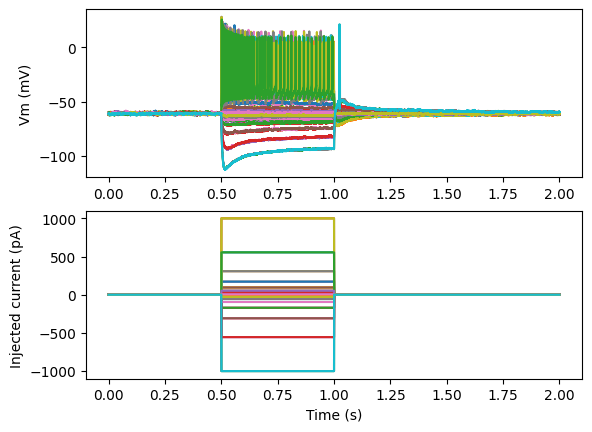

In [7]:
time_axis_1 = np.arange(0, raw_data_cell_1.shape[1]) / sample_rate_1 #s
plt.subplot(211)
plt.plot(time_axis_1, raw_data_cell_1.T)
plt.ylabel('Vm (mV)')
plt.subplot(212)
plt.plot(time_axis_1, stim_1.T)
plt.ylabel('Injected current (pA)')
plt.xlabel('Time (s)')
plt.show()

In [8]:
data_cell_2 = mat_file['data_to_send']['data'][1]
raw_data_cell_2 = np.stack(data_cell_2['raw_data'])
pre_time_cell_2 = data_cell_2['pre_time'][0]
stim_time_cell_2 = data_cell_2['stim_1_time'][0]
tail_time_cell_2 = data_cell_2['tail_time'][0]
current_cell_2 = data_cell_2['pulse_1_curr']
sample_rate_2 = data_cell_2['sample_rate'][0]
stim_2 = np.zeros_like(raw_data_cell_2)
pre_time_point_2 = np.int64(pre_time_cell_2 / 1000 * sample_rate_2)
stim_time_point_2 = np.int64(stim_time_cell_2 / 1000 * sample_rate_2)
stim_array = np.repeat(current_cell_2, stim_time_point).reshape(current_cell_2.shape[0], stim_time_point)
stim_2[:, pre_time_point_2 : (pre_time_point_2 + stim_time_point_2)] = stim_array

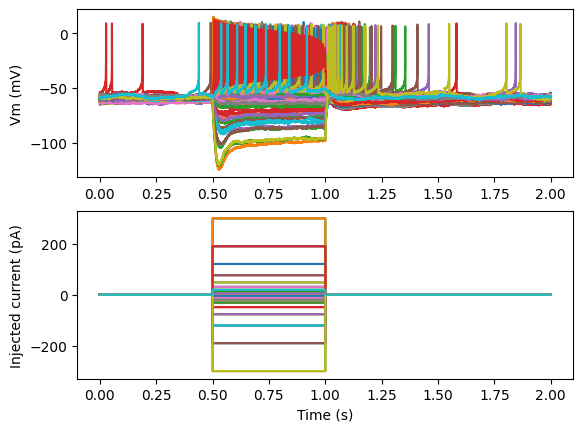

In [9]:
time_axis_2 = np.arange(0, raw_data_cell_2.shape[1]) / sample_rate_2 #s
plt.subplot(211)
plt.plot(time_axis_2, raw_data_cell_2.T)
plt.ylabel('Vm (mV)')
plt.subplot(212)
plt.plot(time_axis_2, stim_2.T)
plt.ylabel('Injected current (pA)')
plt.xlabel('Time (s)')
plt.show()

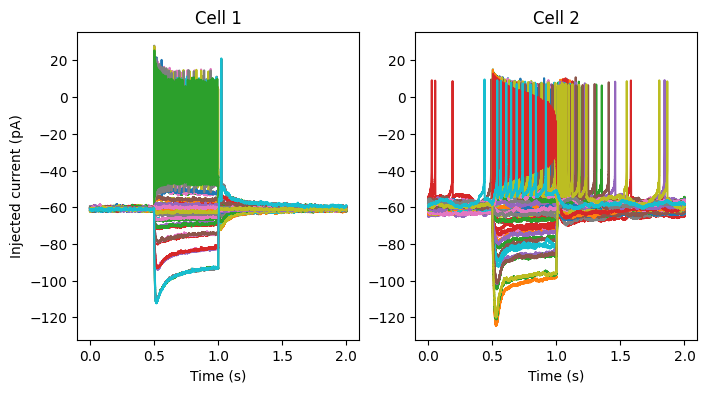

In [10]:
f = plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
plt.plot(time_axis_1, raw_data_cell_1.T)
plt.title('Cell 1')
plt.ylabel('Injected current (pA)')
plt.xlabel('Time (s)')
ax2 = plt.subplot(122, sharey = ax1)
plt.plot(time_axis_2, raw_data_cell_2.T)
plt.title('Cell 2')
plt.xlabel('Time (s)')
plt.show()

In [11]:
idx_largest_1 = np.argmax(current_cell_1)
idx_largest_2 = np.argmax(current_cell_2)

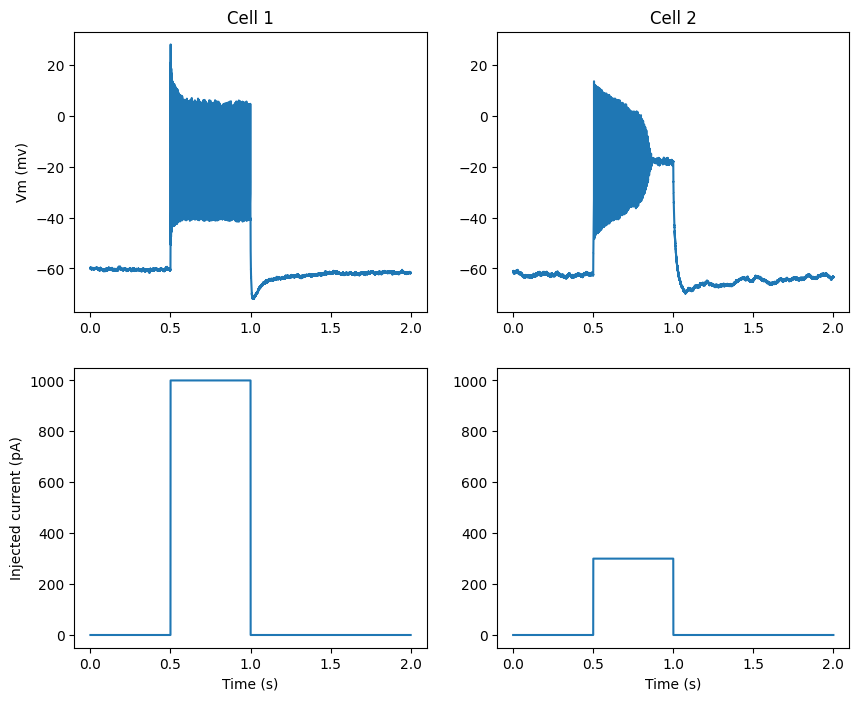

In [12]:
f2 = plt.figure(figsize=(10, 8))
ax1 = plt.subplot(221)
plt.plot(time_axis_1, raw_data_cell_1[idx_largest_1, :])
plt.ylabel('Vm (mv)')
plt.title('Cell 1')
ax2 = plt.subplot(222, sharey = ax1)
plt.plot(time_axis_2, raw_data_cell_2[idx_largest_2, :])
plt.title('Cell 2')
ax3 = plt.subplot(223, sharex = ax1)
plt.plot(time_axis_1, stim_1[idx_largest_1, :])
plt.xlabel('Time (s)')
plt.ylabel('Injected current (pA)')
ax4 = plt.subplot(224, sharex = ax2, sharey = ax3)
plt.plot(time_axis_2, stim_2[idx_largest_2, :])
plt.xlabel('Time (s)')
plt.show()

In [13]:
def get_spike_matrix(raw_data, sample_rate, spike_height, spike_distance, spike_prominence):
  spike_matrix = np.full(raw_data.shape, fill_value=np.nan)
  for i in range(raw_data.shape[0]):
    peaks, _ = find_peaks(raw_data[i, :], height=spike_height, distance=spike_distance / 1000 * sample_rate, prominence=spike_prominence)
    spike_matrix[i, peaks] = 1
  return spike_matrix

In [14]:
spike_matrix_1 = get_spike_matrix(raw_data_cell_1, sample_rate_1, 0, 1, 6) #spike distance = 1 ms, prominence = 6 mv
spike_matrix_2 = get_spike_matrix(raw_data_cell_2, sample_rate_1, 0, 1, 6) #spike distance = 1 ms, prominence = 6 mv

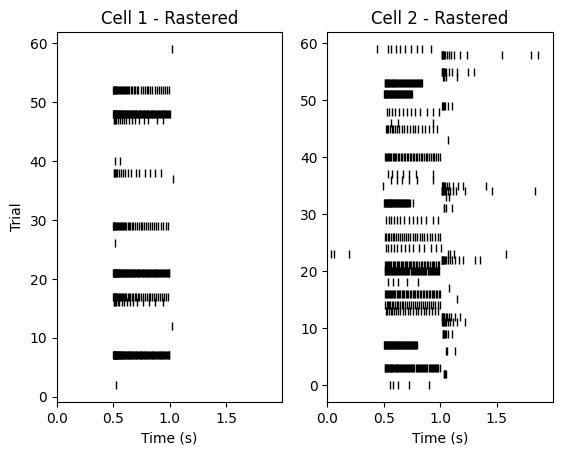

In [15]:
f = plt.figure()
ax1 = plt.subplot(121)
plt.plot(time_axis_1, np.multiply(spike_matrix_1, np.arange(0, raw_data_cell_1.shape[0]).reshape(60, 1)).T, 'k|')
plt.xlim([0, np.max(time_axis_1)])
plt.title('Cell 1 - Rastered')
plt.ylabel('Trial')
plt.xlabel('Time (s)')
ax2 = plt.subplot(122)
plt.plot(time_axis_2, np.multiply(spike_matrix_2, np.arange(0, raw_data_cell_2.shape[0]).reshape(60, 1)).T, 'k|')
plt.xlim([0, np.max(time_axis_2)])
plt.title('Cell 2 - Rastered')
plt.xlabel('Time (s)')
plt.show()


In [16]:
spike_during_stim_1 = np.nansum(spike_matrix_1[:, pre_time_point : pre_time_point + stim_time_point], axis = 1)
spike_during_stim_2 = np.nansum(spike_matrix_2[:, pre_time_point_2 : pre_time_point_2 + stim_time_point_2], axis = 1)

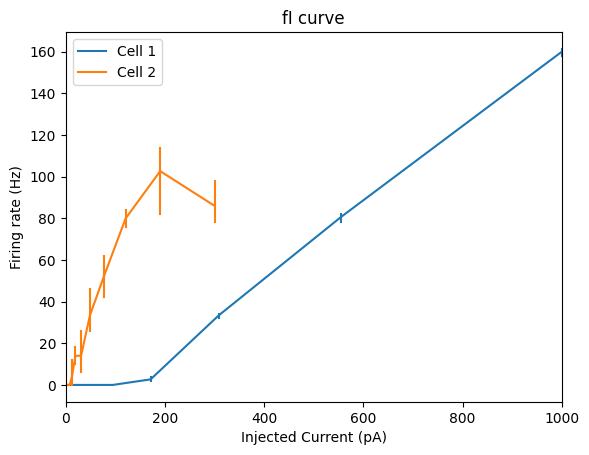

In [17]:
sns.lineplot(x = current_cell_1, y = np.divide(spike_during_stim_1, (stim_time_cell_1 / 1000)), err_style= 'bars', label='Cell 1')
sns.lineplot(x = current_cell_2, y = np.divide(spike_during_stim_2, (stim_time_cell_2 / 1000)), err_style= 'bars', label='Cell 2')
plt.xlim([0, np.max(current_cell_1)])
plt.xlabel('Injected Current (pA)')
plt.ylabel('Firing rate (Hz)')
plt.title('fI curve')
plt.show()

In [52]:
def get_first_spike_from_depolarization(raw_data, spike_matrix, sample_rate, pre_time, stim_time, currents, window = 1):
  depol_indices = np.argwhere(currents > 0)
  window_size = window * sample_rate / 1000
  ap_traces = np.full((depol_indices.shape[0], np.int64(window_size * 2)), fill_value= np.nan)
  pre_point = np.int64(pre_time / 1000 * sample_rate)
  stim_point = np.int64(stim_time / 1000 * sample_rate)

  for i in range(depol_indices.shape[0]):
    spikes_indices = spike_matrix[depol_indices[i], pre_point : pre_point + stim_point]
    spikes_indices = np.argwhere(spikes_indices == 1)
    if spikes_indices.shape[0] > 0:
      idx = spikes_indices[0][1]
      ap_traces[i, :] = raw_data[depol_indices[i], np.int64(pre_point + idx - window_size) : np.int64(pre_point + idx + window_size)]

  time_axis =  (np.arange(0,window_size * 2) - window_size )/ sample_rate * 1000 #ms
  return ap_traces, time_axis


In [55]:
ap_trace_cell_1, time_1 = get_first_spike_from_depolarization(raw_data_cell_1, spike_matrix_1,
                                                              sample_rate_1, pre_time_cell_1, stim_time_cell_1, current_cell_1, 1)
ap_trace_cell_2, time_2 = get_first_spike_from_depolarization(raw_data_cell_2, spike_matrix_2,
                                                              sample_rate_2, pre_time_cell_2, stim_time_cell_2, current_cell_2, 1)


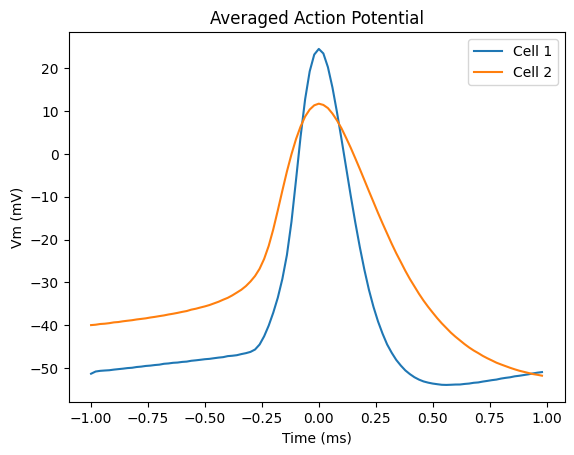

In [62]:
plt.plot(time_1, np.nanmean(ap_trace_cell_1, 0), label = 'Cell 1')
plt.plot(time_2, np.nanmean(ap_trace_cell_2, 0), label = 'Cell 2')
plt.xlabel('Time (ms)')
plt.ylabel('Vm (mV)')
plt.title('Averaged Action Potential')
plt.legend()
plt.show()


In [121]:
small_hyperpolarizing_step_1_indices = np.nonzero(np.logical_and(current_cell_1 < 0, current_cell_1 > -25))
resting_vm_1 = np.mean(raw_data_cell_1[:, 0:pre_time_point])
stable_vm_1 = np.mean(raw_data_cell_1[small_hyperpolarizing_step_1_indices, pre_time_point : pre_time_point + stim_time_point][0], 1)
small_hyperpolarizing_step_1 = current_cell_1[small_hyperpolarizing_step_1_indices].astype(float)

In [171]:
small_hyperpolarizing_step_2_indices = np.nonzero(np.logical_and(current_cell_2 < 0, current_cell_2 > -25))
resting_vm_2 = np.mean(raw_data_cell_2[:, 0:pre_time_point])
stable_vm_2 = np.mean(raw_data_cell_2[small_hyperpolarizing_step_2_indices, pre_time_point_2 : pre_time_point_2 + stim_time_point_2][0], 1)
small_hyperpolarizing_step_2 = current_cell_2[small_hyperpolarizing_step_2_indices].astype(float)

(array([ 5, 10, 15, 19, 28, 30, 38, 39, 47, 50, 56, 57]),)

In [185]:
fit_1_coef = np.polyfit(small_hyperpolarizing_step_1, stable_vm_1, 1)
fit_1 = np.poly1d(fit_1_coef)
input_resistance_cell_1 = fit_1_coef[0] * 1000 #to GigaOhm to MegaOhm

fit_2_coef = np.polyfit(small_hyperpolarizing_step_2, stable_vm_2, 1)
fit_2 = np.poly1d(fit_2_coef)
input_resistance_cell_2 = fit_2_coef[0] * 1000

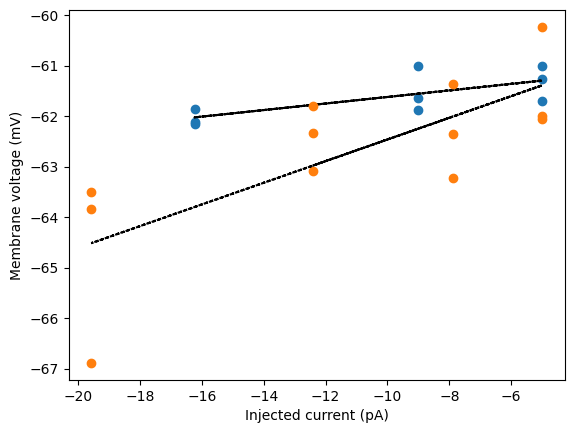

In [186]:
plt.plot(small_hyperpolarizing_step_1, stable_vm_1, 'o', small_hyperpolarizing_step_1, fit_1(small_hyperpolarizing_step_1), ':k')
plt.plot(small_hyperpolarizing_step_2, stable_vm_2, 'o', small_hyperpolarizing_step_2, fit_2(small_hyperpolarizing_step_2), ':k')
plt.xlabel('Injected current (pA)')
plt.ylabel('Membrane voltage (mV)')
plt.show()

Text(0, 0.5, 'Input resistance (MOhm)')

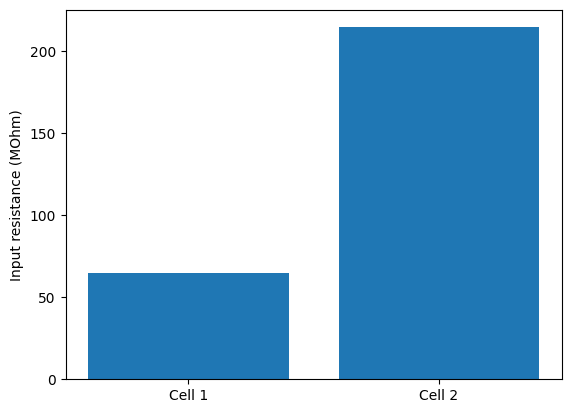

In [188]:
plt.bar(['Cell 1', 'Cell 2'], [input_resistance_cell_1, input_resistance_cell_2])
plt.ylabel('Input resistance (MOhm)')

In [191]:
idx_smallest_1 = np.argmin(current_cell_1)
idx_smallest_2 = np.argmin(current_cell_2)

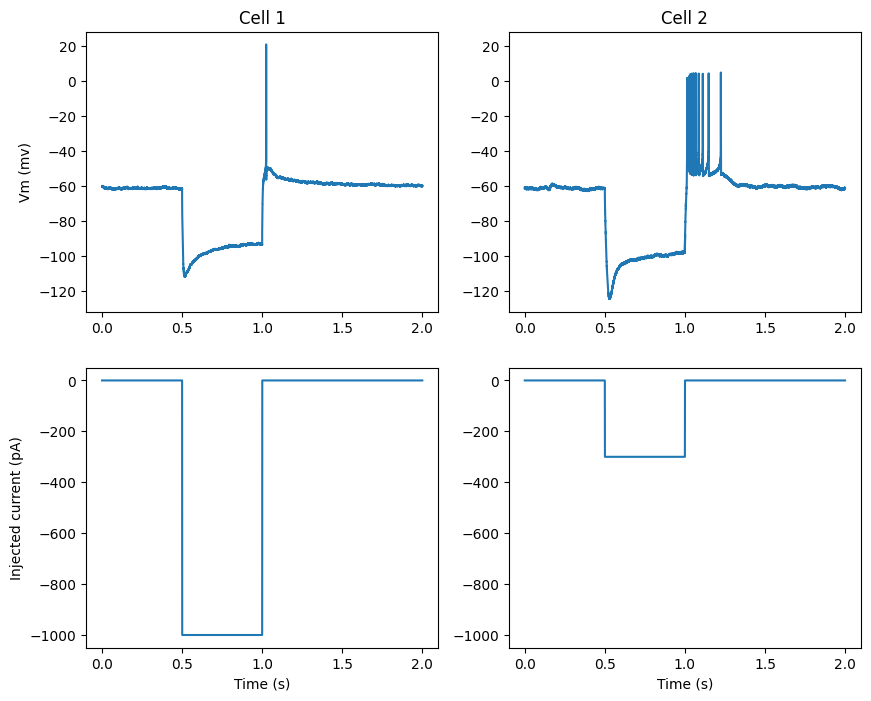

In [192]:
f3 = plt.figure(figsize=(10, 8))
ax1 = plt.subplot(221)
plt.plot(time_axis_1, raw_data_cell_1[idx_smallest_1, :])
plt.ylabel('Vm (mv)')
plt.title('Cell 1')
ax2 = plt.subplot(222, sharey = ax1)
plt.plot(time_axis_2, raw_data_cell_2[idx_smallest_2, :])
plt.title('Cell 2')
ax3 = plt.subplot(223, sharex = ax1)
plt.plot(time_axis_1, stim_1[idx_smallest_1, :])
plt.xlabel('Time (s)')
plt.ylabel('Injected current (pA)')
ax4 = plt.subplot(224, sharex = ax2, sharey = ax3)
plt.plot(time_axis_2, stim_2[idx_smallest_2, :])
plt.xlabel('Time (s)')
plt.show()